<a href="https://colab.research.google.com/github/ElenaL00/Artificial-Intelligence---Ergasia-3/blob/main/MNIST_Tensorflow_Lyhnaropoulou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds

Seeds enable the reproduction of the experiments.

In [ ]:
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

# Load MNIST Dataset using Tensorflow

In [ ]:
(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

11490434/11490434 [==============================] - 1s 0us/step
Training Size - Inputs:(60000, 28, 28), Targets:(60000,)
Test Size - Inputs:(10000, 28, 28), Targets:(10000,)


# Displaying Random Digits

In [ ]:
rows = 5
digits_per_row = 5

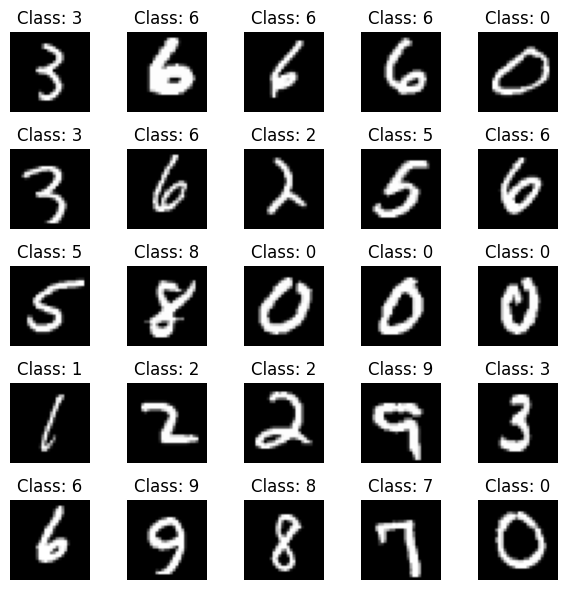

In [ ]:
fig, axes = plt.subplots(nrows=rows, ncols=digits_per_row, figsize=(6, 6))
axes = axes.flatten()

# Selecting random ids from 0 to 60000
total_digits = rows*digits_per_row
random_ids= np.random.choice(x_train.shape[0], total_digits, replace=False)

# Plotting the selected digits.
for i, ax in enumerate(axes):
    idx = random_ids[i]
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f'Class: {y_train[idx]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# Preprocessing Inputs


*   Deep Neural Networks require vectors are inputs. Since the digits are 28x28
*   One-hot Encoding is required for targets, since we use 10 classes. (e.g. 0 will be classified as 0 0 0 0 0 0 0 0 0 1, one will be classified as 0 0 0 0 0 0 0 0 1 0, etc.

grayscale images, they should be converted to vectors of 784 size.

In [ ]:
x_train = x_train.reshape((60000, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

Training Size - Inputs:(60000, 784), Targets:(60000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)


# Construct Deep Neural Network





*   Input: 784 Features
*   Hiddens: 2 Hiddens of 256 units, which pass through tanh activation.
*   Output: 10 probabilities (1 for each class). Softmax activation is required to convert the network's outputs into probabilities.



In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 256)               200960    
                                                                 
 hidden-2 (Dense)            (None, 256)               65792     
                                                                 
 outputs (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9254 - accuracy: 0.7351 - val_loss: 0.5224 - val_accuracy: 0.8592
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4677 - accuracy: 0.8718 - val_loss: 0.3993 - val_accuracy: 0.8895
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3797 - accuracy: 0.8942 - val_loss: 0.3452 - val_accuracy: 0.9013
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3348 - accuracy: 0.9049 - val_loss: 0.3091 - val_accuracy: 0.9083
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3024 - accuracy: 0.9144 - val_loss: 0.2921 - val_accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2801 - accuracy: 0.9197 - val_loss: 0.2716 - val_accuracy: 0.9200
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2638 - accuracy: 0.9246 - val_loss: 0.2607 - val_acc

# Display Loss and Accuracy per Training Epoch

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

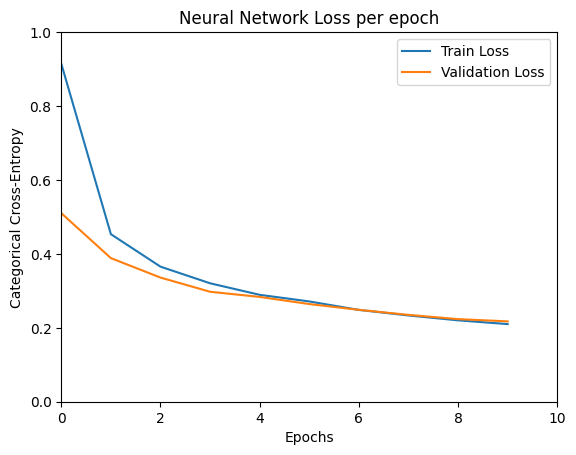

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Neural Network Loss per epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

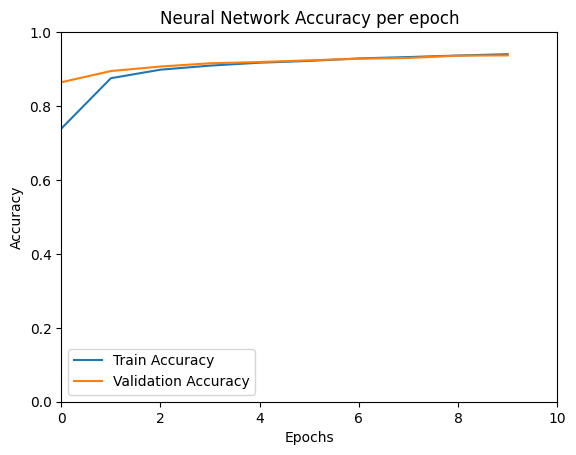

In [ ]:
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Neural Network Accuracy per epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xlim(0, epochs)
plt.ylim(0, 1)
plt.legend()
plt.show()

# --- TODOs ---

## 1. Hyperparameter Tuning: Try adjusting number of hidden layers, hidden units, activation function, learning rate, number of epochs, etc.


## **Layers Tuning (3,5,10)**

Layers=3

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9331 - accuracy: 0.7413 - val_loss: 0.5284 - val_accuracy: 0.8581
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4661 - accuracy: 0.8732 - val_loss: 0.3974 - val_accuracy: 0.8899
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3778 - accuracy: 0.8930 - val_loss: 0.3378 - val_accuracy: 0.9037
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3284 - accuracy: 0.9070 - val_loss: 0.3074 - val_accuracy: 0.9104
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2984 - accuracy: 0.9143 - val_loss: 0.2838 - val_accuracy: 0.9176
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2738 - accuracy: 0.9208 - val_loss: 0.2614 - val_accuracy: 0.9211
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2529 - accuracy: 0.9270 - val_loss: 0.2498 - val_acc

Layers = 5

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-4'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-5'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.9975 - accuracy: 0.7273 - val_loss: 0.5338 - val_accuracy: 0.8643
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4666 - accuracy: 0.8732 - val_loss: 0.3910 - val_accuracy: 0.8907
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3644 - accuracy: 0.8964 - val_loss: 0.3342 - val_accuracy: 0.9024
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.3181 - accuracy: 0.9086 - val_loss: 0.3012 - val_accuracy: 0.9131
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2864 - accuracy: 0.9166 - val_loss: 0.2742 - val_accuracy: 0.9202
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2628 - accuracy: 0.9239 - val_loss: 0.2512 - val_accuracy: 0.9258
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2428 - accuracy: 0.9290 - val_loss: 0.2434 - val_ac

Layers = 10

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-3'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-4'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-5'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-6'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-7'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-8'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-9'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-10'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.0125 - accuracy: 0.7191 - val_loss: 0.5330 - val_accuracy: 0.8599
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.4544 - accuracy: 0.8736 - val_loss: 0.3737 - val_accuracy: 0.8907
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3544 - accuracy: 0.8986 - val_loss: 0.3230 - val_accuracy: 0.9043
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3112 - accuracy: 0.9086 - val_loss: 0.2833 - val_accuracy: 0.9167
Epoch 5/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.2766 - accuracy: 0.9179 - val_loss: 0.2680 - val_accuracy: 0.9190
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2582 - accuracy: 0.9230 - val_loss: 0.2493 - val_accuracy: 0.9266
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2395 - accuracy: 0.9283 - val_loss: 0.2368 -

## **Units Tuning (64, 128, 512)**

Units = 64

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=64, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=64, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2489 - accuracy: 0.6400 - val_loss: 0.7864 - val_accuracy: 0.8067
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6815 - accuracy: 0.8256 - val_loss: 0.5635 - val_accuracy: 0.8559
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5295 - accuracy: 0.8636 - val_loss: 0.4771 - val_accuracy: 0.8744
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4574 - accuracy: 0.8785 - val_loss: 0.4199 - val_accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4086 - accuracy: 0.8887 - val_loss: 0.3857 - val_accuracy: 0.8938
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3822 - accuracy: 0.8945 - val_loss: 0.3618 - val_accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3533 - accuracy: 0.9002 - val_loss: 0.3384 - val_accuracy:

Units = 128

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=128, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.1714 - accuracy: 0.6620 - val_loss: 0.6860 - val_accuracy: 0.8223
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5964 - accuracy: 0.8413 - val_loss: 0.4949 - val_accuracy: 0.8699
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4626 - accuracy: 0.8745 - val_loss: 0.4070 - val_accuracy: 0.8896
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4006 - accuracy: 0.8889 - val_loss: 0.3683 - val_accuracy: 0.8978
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3630 - accuracy: 0.8982 - val_loss: 0.3318 - val_accuracy: 0.9080
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3329 - accuracy: 0.9052 - val_loss: 0.3170 - val_accuracy: 0.9101
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3126 - accuracy: 0.9115 - val_loss: 0.3002 - val_accuracy:

Units = 512

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=512, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 22s 11ms/step - loss: 0.7456 - accuracy: 0.7891 - val_loss: 0.4344 - val_accuracy: 0.8811
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.3870 - accuracy: 0.8917 - val_loss: 0.3392 - val_accuracy: 0.9032
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3168 - accuracy: 0.9113 - val_loss: 0.2973 - val_accuracy: 0.9142
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2769 - accuracy: 0.9221 - val_loss: 0.2688 - val_accuracy: 0.9228
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2507 - accuracy: 0.9295 - val_loss: 0.2548 - val_accuracy: 0.9267
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2307 - accuracy: 0.9350 - val_loss: 0.2348 - val_accuracy: 0.9324
Epoch 7/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2132 - accuracy: 0.9398 - val_loss: 0.2241 - val_

## **Activation Function Tuning (relu, sigmoid)**

Activation = relu

In [ ]:
activation = 'relu'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5203 - accuracy: 0.8768 - val_loss: 0.3648 - val_accuracy: 0.9240
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2419 - accuracy: 0.9396 - val_loss: 0.2837 - val_accuracy: 0.9358
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1491 - accuracy: 0.9577 - val_loss: 0.2676 - val_accuracy: 0.9414
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1066 - accuracy: 0.9686 - val_loss: 0.2426 - val_accuracy: 0.9469
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0814 - accuracy: 0.9752 - val_loss: 0.2440 - val_accuracy: 0.9483
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.2333 - val_accuracy: 0.9505
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0479 - accuracy: 0.9853 - val_loss: 0.2309 - val_accu

Activation = sigmoid

In [ ]:
activation = 'sigmoid'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 2.0958 - accuracy: 0.4352 - val_loss: 1.8588 - val_accuracy: 0.6488
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6855 - accuracy: 0.7107 - val_loss: 1.4966 - val_accuracy: 0.7641
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.3581 - accuracy: 0.7797 - val_loss: 1.2029 - val_accuracy: 0.8104
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.1024 - accuracy: 0.8160 - val_loss: 0.9852 - val_accuracy: 0.8361
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.9150 - accuracy: 0.8397 - val_loss: 0.8272 - val_accuracy: 0.8520
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7805 - accuracy: 0.8547 - val_loss: 0.7133 - val_accuracy: 0.8674
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6820 - accuracy: 0.8658 - val_loss: 0.6295 - val_accur

## **Learning Rate Tuning (0.01, 0.0001)**

Learning Rate = 0.01

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.01
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5601 - accuracy: 0.8418 - val_loss: 0.4155 - val_accuracy: 0.8854
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3954 - accuracy: 0.8829 - val_loss: 0.3491 - val_accuracy: 0.8975
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3873 - accuracy: 0.8849 - val_loss: 0.3813 - val_accuracy: 0.8867
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3908 - accuracy: 0.8811 - val_loss: 0.3752 - val_accuracy: 0.8879
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3784 - accuracy: 0.8843 - val_loss: 0.3472 - val_accuracy: 0.8970
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3601 - accuracy: 0.8901 - val_loss: 0.3541 - val_accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3594 - accuracy: 0.8913 - val_loss: 0.3350 - val_acc

Learning Rate = 0.0001

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.0001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.0245 - accuracy: 0.3093 - val_loss: 1.5662 - val_accuracy: 0.5182
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3550 - accuracy: 0.6058 - val_loss: 1.1535 - val_accuracy: 0.6823
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0563 - accuracy: 0.7139 - val_loss: 0.9374 - val_accuracy: 0.7521
Epoch 4/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.8856 - accuracy: 0.7672 - val_loss: 0.8080 - val_accuracy: 0.7913
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7741 - accuracy: 0.7988 - val_loss: 0.7218 - val_accuracy: 0.8118
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6971 - accuracy: 0.8199 - val_loss: 0.6573 - val_accuracy: 0.8280
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6404 - accuracy: 0.8340 - val_loss: 0.6108 - val_accu

## **Epochs Tuning (15,20,30)**

Epochs = 15

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 15

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9048 - accuracy: 0.7453 - val_loss: 0.5137 - val_accuracy: 0.8641
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4565 - accuracy: 0.8750 - val_loss: 0.3948 - val_accuracy: 0.8900
Epoch 3/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3722 - accuracy: 0.8962 - val_loss: 0.3398 - val_accuracy: 0.9042
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3276 - accuracy: 0.9069 - val_loss: 0.3057 - val_accuracy: 0.9141
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2988 - accuracy: 0.9144 - val_loss: 0.2886 - val_accuracy: 0.9167
Epoch 6/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2760 - accuracy: 0.9195 - val_loss: 0.2724 - val_accuracy: 0.9196
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2590 - accuracy: 0.9255 - val_loss: 0.2566 - val_accu

Epochs = 20

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 20

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9249 - accuracy: 0.7351 - val_loss: 0.5213 - val_accuracy: 0.8600
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4650 - accuracy: 0.8726 - val_loss: 0.3973 - val_accuracy: 0.8924
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3790 - accuracy: 0.8934 - val_loss: 0.3404 - val_accuracy: 0.9057
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3317 - accuracy: 0.9066 - val_loss: 0.3112 - val_accuracy: 0.9124
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3004 - accuracy: 0.9139 - val_loss: 0.2866 - val_accuracy: 0.9173
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2760 - accuracy: 0.9220 - val_loss: 0.2703 - val_accuracy: 0.9243
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2603 - accuracy: 0.9261 - val_loss: 0.2579 - val_accu

Epochs = 30

In [ ]:
activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 30

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
#model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9184 - accuracy: 0.7401 - val_loss: 0.5284 - val_accuracy: 0.8586
Epoch 2/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4641 - accuracy: 0.8713 - val_loss: 0.3962 - val_accuracy: 0.8881
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3763 - accuracy: 0.8942 - val_loss: 0.3430 - val_accuracy: 0.9011
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3243 - accuracy: 0.9081 - val_loss: 0.3117 - val_accuracy: 0.9077
Epoch 5/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2962 - accuracy: 0.9151 - val_loss: 0.2871 - val_accuracy: 0.9150
Epoch 6/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2748 - accuracy: 0.9217 - val_loss: 0.2694 - val_accuracy: 0.9217
Epoch 7/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2564 - accuracy: 0.9264 - val_loss: 0.2577 - val_accu

## 2. Validation: Show 1 misclassified digit from each class.

313/313 [==============================] - 1s 2ms/step


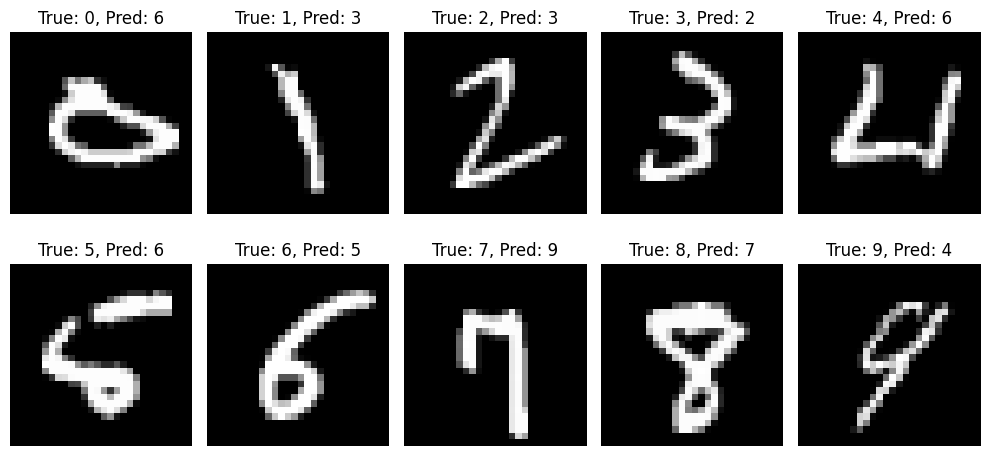

In [ ]:
# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Identify misclassified samples for each class
misclassified_indices = {i: [] for i in range(10)}
for idx, (pred, true) in enumerate(zip(y_pred_classes, y_true_classes)):
    if pred != true:
        misclassified_indices[true].append(idx)

# Display one misclassified digit from each class
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
axes = axes.flatten()

for i in range(10):
    if misclassified_indices[i]:  # Check if there are any misclassified samples for class i
        idx = misclassified_indices[i][0]  # Take the first misclassified sample
        ax = axes[i]
        ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {y_true_classes[idx]}, Pred: {y_pred_classes[idx]}')
        ax.axis('off')

plt.tight_layout()
plt.show()

## 3. Suggest & Implement workflow improvements, aside hyperparameter tuning. Can you think of any ways to increase the overall accuracy of the Neural Network?

Για βελτίωση της απόδοσης του νευρωνικού δίκτυου προτείνεται η αύξηση του αρχικού δείγματος εικόνων με παραλλαγές τους, οι οποίες προκύπτουν π.χ. με zoom, shifting, rotation κτλ.
Στον παρακάτω κώδικα, επιλέγονται με τυχαίο τρόπο ένα 10% των αρχικών εικόνων στις οποίες εφαρμόζονται από 5 παραλλαγές. Έπομένως για ένα αρχικό δείγμα 60000 εικόνων δημιουργούνται επιπλέον 6000x5=30000 νέες εικόνες και έτσι το δείγμα αυξάνεται σε 90000.

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# Setting Environment Seeds
random.seed(0)
np.random.seed(seed=0)
tf.random.set_seed(seed=0)

(x_train, y_train), (x_test, y_test ) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

# Select 10% of the original images
num_original_images = x_train.shape[0]
num_augmented_images = int(0.1 * num_original_images)
selected_indices = np.random.choice(num_original_images, num_augmented_images, replace=False)

# Data Augmentation Generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,     # Randomly rotate images by 0 to 10 degrees
    width_shift_range=0.1, # Randomly shift images horizontally by 0 to 10%
    height_shift_range=0.1,# Randomly shift images vertically by 0 to 10%
    zoom_range=0.1         # Randomly zoom images by 0 to 10%
)

# Create augmented images
augmented_images = []
augmented_labels = []

for idx in selected_indices:
    image = x_train[idx].reshape((1, 28, 28, 1))  # Reshape image for the generator
    label = y_train[idx]
    i = 0
    for batch in datagen.flow(image, batch_size=1):
        if i >= 5:
            break
        augmented_images.append(batch[0].reshape(28, 28))  # Reshape back to 28x28
        augmented_labels.append(label)
        i += 1

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

# Append augmented images and labels to the original dataset
x_train = np.concatenate((x_train, augmented_images), axis=0)
y_train = np.concatenate((y_train, augmented_labels), axis=0)

# Verify the new sizes
print(
    f'New Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
)

# Preprocessing Inputs

x_train = x_train.reshape((-1, 784))
y_train = tf.one_hot(y_train, depth=10)
x_test = x_test.reshape((10000, 784))
y_test = tf.one_hot(y_test, depth=10)

print(
    f'Training Size - Inputs:{x_train.shape}, Targets:{y_train.shape}'
    f'\nTest Size - Inputs:{x_test.shape}, Targets:{y_test.shape}'
)

# Construct Deep Neural Network

activation = 'tanh'
loss = 'categorical_crossentropy' # Do not change this loss function.
metrics = ['accuracy']
learning_rate = 0.001
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate) # Do not change this optimizer.
epochs = 10

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,), name='input'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-1'),
    tf.keras.layers.Dense(units=256, activation=activation, name='hidden-2'),
    tf.keras.layers.Dense(units=10, activation='softmax', name='outputs') # Do not change this activation function.
])
model.summary(expand_nested=True)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
history = model.fit(
    x=x_train,
    y=y_train,
    epochs=epochs,
    validation_data=(x_test, y_test)
)


New Training Size - Inputs:(90000, 28, 28), Targets:(90000,)
Training Size - Inputs:(90000, 784), Targets:(90000, 10)
Test Size - Inputs:(10000, 784), Targets:(10000, 10)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden-1 (Dense)            (None, 256)               200960    
                                                                 
 hidden-2 (Dense)            (None, 256)               65792     
                                                                 
 outputs (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2813/2813 [==============================] - 9s 3ms/step - loss: 1.0950 - accuracy: 0.6635 - val_los

## 4. Upload the exercise in your GitHub repository. Google Colab can instantly deploy this notebook into a Github repository.

## 5. Write a README file in your github repository, explaining:

1. Your workflow
2. The final model architecture
3. The selected hyperparameters
4. Include the requirements.txt file, which shows the python version, as well as the library versions.

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [ ]:
!pip freeze

absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.8.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.3
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4.6
contextlib2==21.6.0
contourpy==1.2.1
cryptography==42.0.7
cuda-python==12.2.1
cudf-cu12 @ https://pypi.nvidia.c